# Machine Learning LAB 5 - Classification II (Logistic Regression)
<hr/>

Submitted by<br>
Name: **Milan Jasani** <br>
Register No: **21122026**<br>
Class: **MSCDS**<br>
<hr/>

### Sections
Here, you mention the sections you have defined in the below code. For this lab, the sections are -
1. Lab Overview
1. Part-A
    1. Apply Logistic Regression for Breast Cancer Dataset.
    1. Use 60:40 train-test ratio for splitting the dataset.
1. Questions
    1. Demonstrate the Logistic Regression for different penalties/regularisation methods - none, l1, l2 (you may use 'saga' solver as the parameter)
    2. What happens when the Maximum Iterations are kept as 1, 2, 5, 10, 20, 50, 100, 500 and 1000? Is there any change in the accuracy.
    3. Get the attributes: classes_, coef_ and intercept_ and print the same in the above case.
1. conclusion
1. References


## 1. Lab Overview  
### Objectives

### Sections
1. Lab Overview
1. Part-A
    1. Apply Logistic Regression for Breast Cancer Dataset.
    1. Use 60:40 train-test ratio for splitting the dataset.
1. Questions
    1. Demonstrate the Logistic Regression for different penalties/regularisation methods - none, l1, l2 (you may use 'saga' solver as the parameter)
    2. What happens when the Maximum Iterations are kept as 1, 2, 5, 10, 20, 50, 100, 500 and 1000? Is there any change in the accuracy.
    3. Get the attributes: classes_, coef_ and intercept_ and print the same in the above case.


### **Importing Necessary Library**

In [162]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import datasets, metrics, decomposition
from sklearn.metrics import confusion_matrix, RocCurveDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### **Read CSV**

In [163]:
df = pd.read_csv("C:/Users/milan/Downloads/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [164]:
df.info() # info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [165]:
df.describe() # description of the dataset

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [166]:
df = df.drop(['id','Unnamed: 32'], axis=1) #Removing unnecessary column

#### Plot heatmap

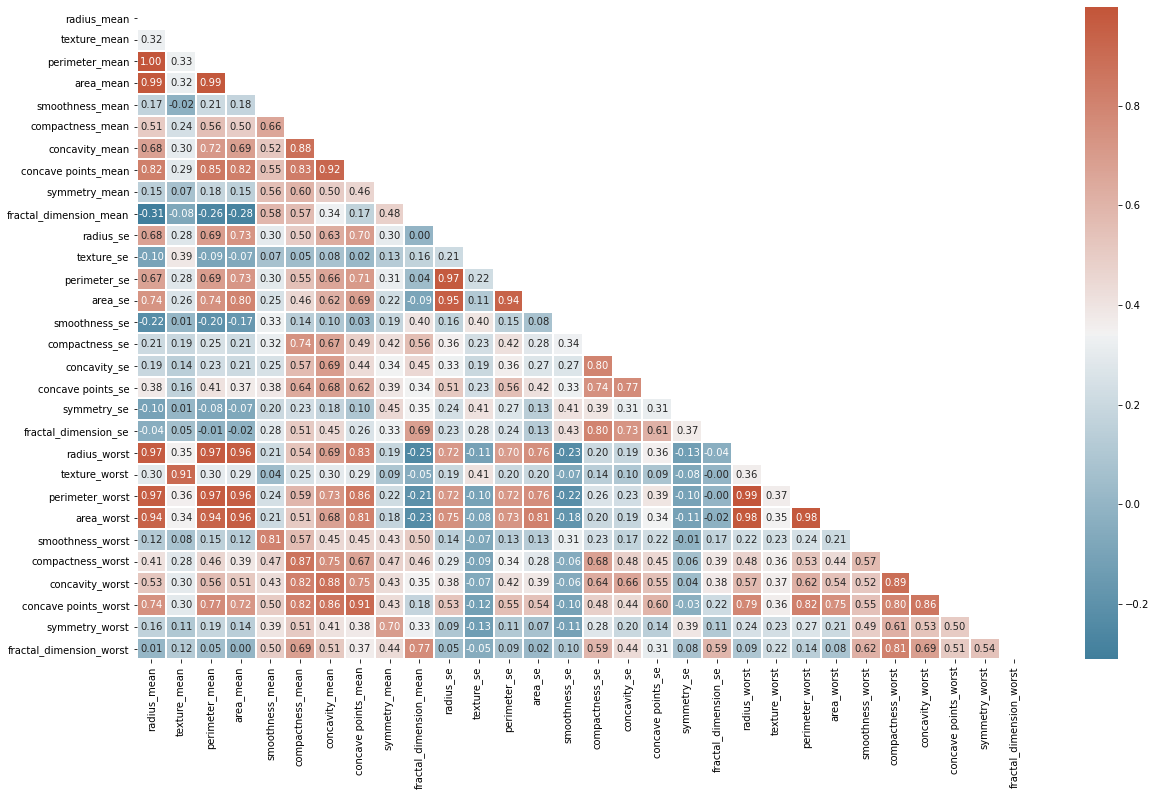

In [167]:
plt.figure(figsize = (20, 12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask = mask, linewidths = 1, cmap=cmap, annot = True, fmt = ".2f")
plt.show()

#### Replace with  binary value of target variable

In [168]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')

#### Assign target variable and independent variable to new variable

In [169]:
Y = df['diagnosis']
X = df.drop('diagnosis', axis=1)

#### Here we take all the variable for the predict target variable

#### Training-Spliting of the dataset

In [170]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.40,random_state = 11)

In [171]:
X_train.shape

(341, 30)

In [172]:
X_test.shape

(228, 30)

In [173]:
import warnings
warnings.filterwarnings('ignore') # Remove the warning 

#### Build the simple logistic regression model

In [174]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

#### Predict the target variable and check the accuracy for our model

In [175]:
y_predict = lr.predict(X_test)
accuracy_score(y_test, y_predict)

0.9429824561403509

#### Classification report for the our model

In [176]:
print(
    f"Classification report for classifier {lr}:\n"
    f"{metrics.classification_report(y_test, y_predict)}\n"
)


Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       147
           1       0.93      0.91      0.92        81

    accuracy                           0.94       228
   macro avg       0.94      0.94      0.94       228
weighted avg       0.94      0.94      0.94       228




#### Plot the confusion matrix

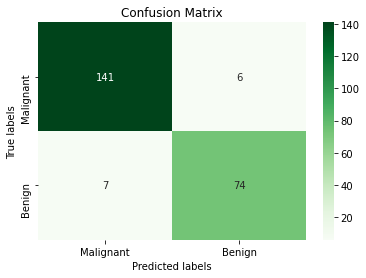

In [177]:
cm = confusion_matrix(y_test, y_predict)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Greens');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Malignant', 'Benign']); ax.yaxis.set_ticklabels(['Malignant', 'Benign']);

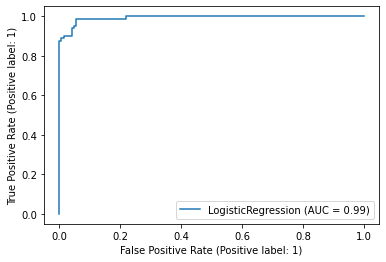

In [178]:
RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.show()

- Here we see the taking a all the variable as for prediction target variable our model is accurate but we have to improve our accuracy so we need to do some data processing and improve our model accuracy

## Data pre-processing

#### Removing highly correlated features with each other

In [179]:
corr_matrix = df.corr().abs() 
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.90)]
df = df.drop(to_drop, axis = 1)
print(f"The reduced dataframe has {df.shape[1]} columns.")

The reduced dataframe has 21 columns.


- Here, we can see the high correlated features are removed from our dataset

#### Shape of the dataset

In [180]:
df.shape

(569, 21)

#### Assign the target and independent variable to other variable

In [181]:
Y = df["diagnosis"]
X = df.drop('diagnosis', axis=1)

#### StandardScaler

In [182]:
# Standardize our data to have a mean of 0 and standard deviation of 1
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape

(569, 20)

#### Again split the with new dataset

In [183]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.4, shuffle=False, random_state=10
)

In [184]:
lr2 = LogisticRegression()
lr2.fit(X_train, y_train)

LogisticRegression()

In [185]:
y_pred = lr2.predict(X_test)

In [186]:
accuracy_score(y_test, y_pred)

0.9605263157894737

In [188]:
print(
    f"Classification report for classifier {lr2}:\n"
    f"{metrics.classification_report(y_test, y_pred)}\n"
)

Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       173
           1       0.86      1.00      0.92        55

    accuracy                           0.96       228
   macro avg       0.93      0.97      0.95       228
weighted avg       0.97      0.96      0.96       228




- Here we can see the after removing the multicolinearity our model accuracy is increased

# Questions

### 1. Demonstrate the Logistic Regression for different penalties/regularisation methods - none, l1, l2 (you may use 'saga' solver as the parameter)

In [196]:
list_s = ['none','l1','l2']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)
for i in list_s:
    if(i=='l1'):
        lr3 = LogisticRegression(penalty = i,solver='liblinear')
        lr3.fit(X_train, y_train)
    else:    
        lr3 = LogisticRegression(penalty = i)
        lr3.fit(X_train, y_train)
    y_pred = lr3.predict(X_test)
    print(f"penalty {i} Accuracy:-{accuracy_score(y_test, y_pred)}")
    print(f"Classification report for penalties {i}:\n" f"{metrics.classification_report(y_test, y_pred)}\n")
    print("===="*10)

penalty none Accuracy:-0.9429824561403509
Classification report for penalties none:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       146
           1       0.91      0.94      0.92        82

    accuracy                           0.94       228
   macro avg       0.94      0.94      0.94       228
weighted avg       0.94      0.94      0.94       228


penalty l1 Accuracy:-0.9736842105263158
Classification report for penalties l1:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       146
           1       1.00      0.93      0.96        82

    accuracy                           0.97       228
   macro avg       0.98      0.96      0.97       228
weighted avg       0.97      0.97      0.97       228


penalty l2 Accuracy:-0.9780701754385965
Classification report for penalties l2:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98  

### 2. What happens when the Maximum Iterations are kept as 1, 2, 5, 10, 20, 50, 100, 500 and 1000? Is there any change in the accuracy.
### 3. Get the attributes: classes_, coef_ and intercept_ and print the same in the above case.

In [199]:
lst_itr = [1, 2, 5, 10, 20, 50, 100, 500, 1000]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)
for j in lst_itr:
    lr4 = LogisticRegression(max_iter = j)
    lr4.fit(X_train, y_train)
    y_pred = lr4.predict(X_test)
    print(f"====== Information for max_iter = {j} ======")
    print(f"Accuracy :-{accuracy_score(y_test, y_pred)}")
    print(f"Classes :- {lr4.classes_}")
    print(f"Coefficient :- {lr4.coef_}")
    print(f"Intercept :- {lr4.intercept_}")
    print()
    print("="*50)
    print()

====== Information for max_iter = 1 ======
Accuracy :-0.8991228070175439
Classes :- ['0' '1']
Coefficient :- [[ 0.18198401  0.30338627  0.1787364   0.01580903  0.02727733  0.27451569
  -0.03503996  0.16041548  0.13592766  0.20027175  0.04249561  0.06963945
   0.24878517  0.36048353  0.19795106  0.29551901  0.32799863  0.3861094
   0.22190345  0.17833419]]
Intercept :- [-0.13517081]


====== Information for max_iter = 2 ======
Accuracy :-0.9122807017543859
Classes :- ['0' '1']
Coefficient :- [[ 0.161382    0.30864259  0.16680024 -0.12048899  0.01850861  0.37902233
  -0.11258012  0.09042734  0.07350202  0.17844686  0.01262519 -0.01817501
   0.36272424  0.51905109  0.19730179  0.31046974  0.36484175  0.48215161
   0.2646059   0.12445813]]
Intercept :- [-0.20475842]


====== Information for max_iter = 5 ======
Accuracy :-0.9780701754385965
Classes :- ['0' '1']
Coefficient :- [[ 0.21066151  0.35244895  0.0774661  -0.65713059 -0.01339217  1.20003337
  -0.15333594 -0.29521902 -0.26340063  0.1

### For all cases with model

In [200]:
lst_itr = [1, 2, 5, 10, 20, 50, 100, 500, 1000]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)
for i in list_s:
    for j in lst_itr:
        if(i=='l1'):
            lr5 = LogisticRegression(max_iter = j,penalty = i,solver='liblinear')
            lr5.fit(X_train, y_train)
        else:
            lr5 = LogisticRegression(penalty = i,max_iter = j)
            lr5.fit(X_train, y_train)
            
        y_pred = lr5.predict(X_test)
        print(f"====== Information for max_iter = {j} and penalty {i} ======")
        print(f"Accuracy :-{accuracy_score(y_test, y_pred)}")
        print(f"Classes :- {lr5.classes_}")
        print(f"Coefficient :- {lr5.coef_}")
        print(f"Intercept :- {lr5.intercept_}")
        print()
        print("="*50)
        print()

====== Information for max_iter = 1 and penalty none ======
Accuracy :-0.9254385964912281
Classes :- ['0' '1']
Coefficient :- [[ 0.18205363  0.2876557   0.16910738 -0.04057518 -0.00855645  0.26177534
  -0.02408219  0.12158755  0.11693098  0.19022216 -0.0313665   0.00619454
   0.26639774  0.37871828  0.2220831   0.29272839  0.34221566  0.41353134
   0.20331996  0.14527937]]
Intercept :- [-0.13803446]


====== Information for max_iter = 2 and penalty none ======
Accuracy :-0.9429824561403509
Classes :- ['0' '1']
Coefficient :- [[ 0.16304039  0.29452713  0.14941932 -0.20053915 -0.02356318  0.37871915
  -0.08082067  0.03971511  0.04823394  0.17520168 -0.08359873 -0.13823768
   0.39290972  0.55289857  0.23633398  0.31535638  0.39788407  0.52897655
   0.23289151  0.07525623]]
Intercept :- [-0.22919285]


====== Information for max_iter = 5 and penalty none ======
Accuracy :-0.9824561403508771
Classes :- ['0' '1']
Coefficient :- [[ 0.27879606  0.34792378 -0.01161998 -0.76398196  0.07415572  1

## conclusion
- Here we see the after removing the multicolinearity and make data standard scalar our model accuracy is increased
- Data preprocessing is important 
- l1, l2 regression is give more accurate result
- different max_iter give different accuracy of the model


## References
- https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a#:~:text=Our%20accuracy%20was%2095.3%25.
- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://stackoverflow.com/questions/47437893/how-to-calculate-logistic-regression-accuracy